In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    classification_report
)

In [2]:
x,y = make_classification(
    n_samples=1000,
    n_features=10,
    random_state=42
)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)

In [4]:
models = {
    "Logistic Regression" : LogisticRegression,
    "Decision Tree Classifier" : DecisionTreeClassifier,
    "Random Forest Classifier" : RandomForestClassifier,
    "XGBoost Classifier" : XGBClassifier
}

Logistic Regression :- 
	Train Score:- 87.00%
	Test Score :- 83.00%
	Accuracy Score :- 83.00%
	Precision Score :- 86.67%
	Recall Score = 81.98%
	F1 Score = 84.26%
	Confusion Matrix:- [[75 14]
 [20 91]]
Classification Report on Logistic Regression :- 
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        89
           1       0.87      0.82      0.84       111

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200



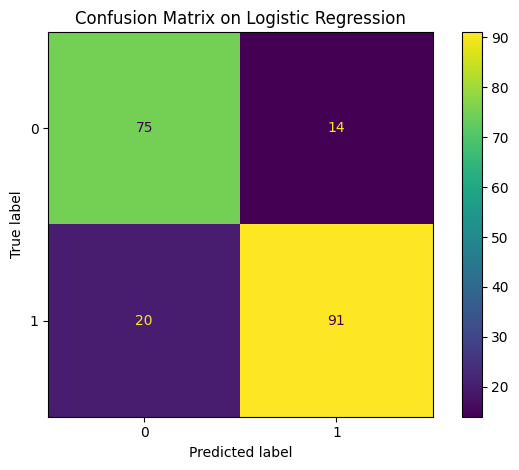

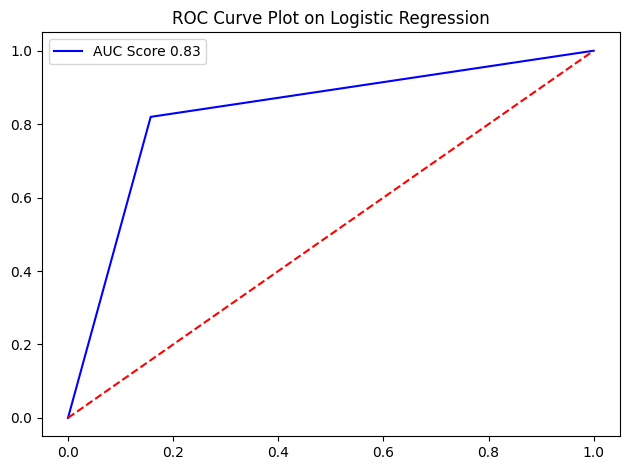

----------------------------------------------------------------------------------------------------
Decision Tree Classifier :- 
	Train Score:- 100.00%
	Test Score :- 83.50%
	Accuracy Score :- 83.50%
	Precision Score :- 85.45%
	Recall Score = 84.68%
	F1 Score = 85.07%
	Confusion Matrix:- [[73 16]
 [17 94]]
Classification Report on Decision Tree Classifier :- 
              precision    recall  f1-score   support

           0       0.81      0.82      0.82        89
           1       0.85      0.85      0.85       111

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.84      0.83      0.84       200



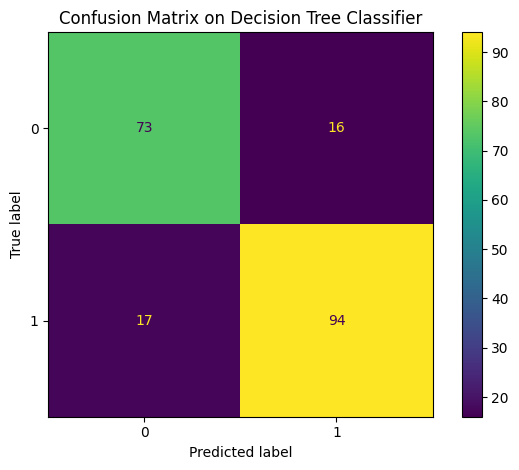

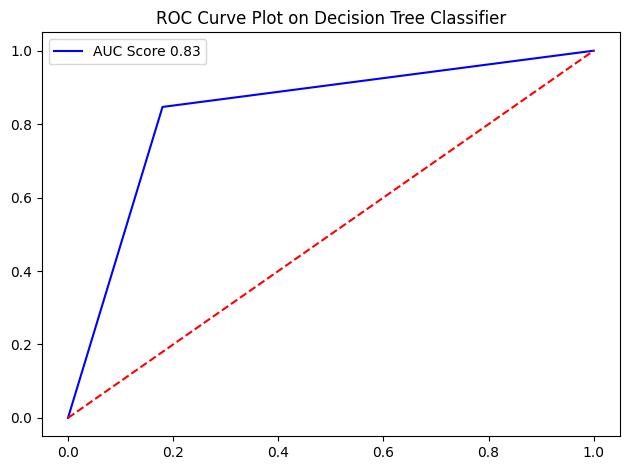

----------------------------------------------------------------------------------------------------
Random Forest Classifier :- 
	Train Score:- 100.00%
	Test Score :- 88.50%
	Accuracy Score :- 88.50%
	Precision Score :- 92.31%
	Recall Score = 86.49%
	F1 Score = 89.30%
	Confusion Matrix:- [[81  8]
 [15 96]]
Classification Report on Random Forest Classifier :- 
              precision    recall  f1-score   support

           0       0.84      0.91      0.88        89
           1       0.92      0.86      0.89       111

    accuracy                           0.89       200
   macro avg       0.88      0.89      0.88       200
weighted avg       0.89      0.89      0.89       200



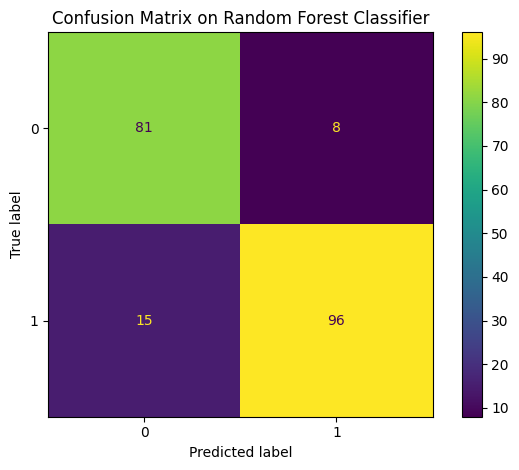

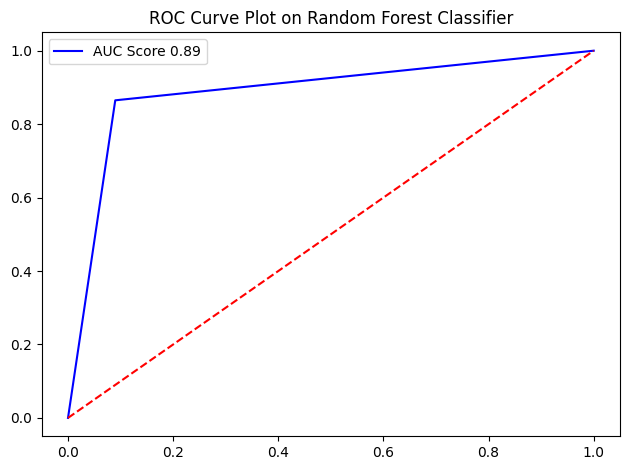

----------------------------------------------------------------------------------------------------
XGBoost Classifier :- 
	Train Score:- 100.00%
	Test Score :- 89.50%
	Accuracy Score :- 89.50%
	Precision Score :- 93.27%
	Recall Score = 87.39%
	F1 Score = 90.23%
	Confusion Matrix:- [[82  7]
 [14 97]]
Classification Report on XGBoost Classifier :- 
              precision    recall  f1-score   support

           0       0.85      0.92      0.89        89
           1       0.93      0.87      0.90       111

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200



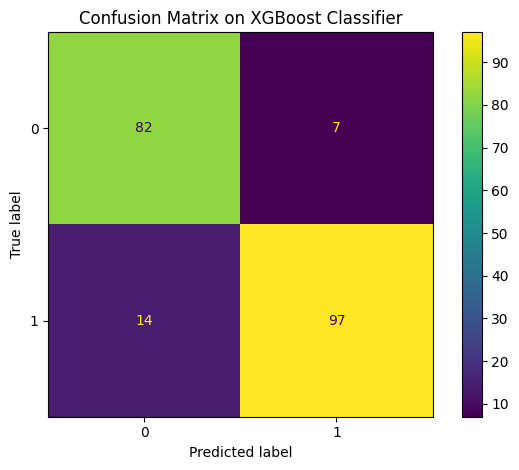

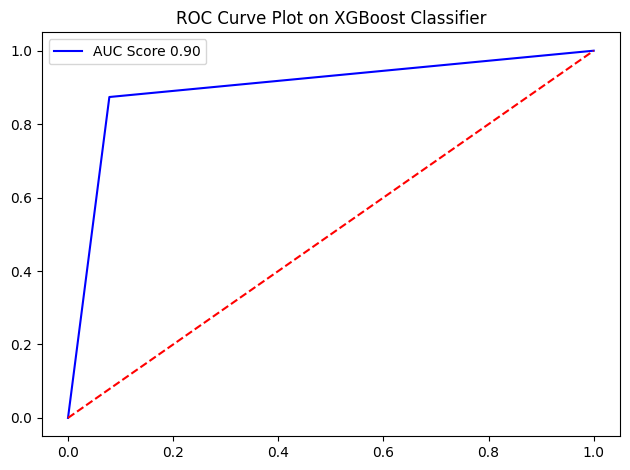

----------------------------------------------------------------------------------------------------


In [5]:
result_list = []
score_list = []

for name, model_class in models.items():
    model = model_class()
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision_score_val = precision_score(y_test, y_pred)
    recall_score_val = recall_score(y_test, y_pred)
    f1_score_val = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"{name} :- ")
    print(f"\tTrain Score:- {train_score*100:.2f}%")
    print(f"\tTest Score :- {test_score*100:.2f}%")
    print(f"\tAccuracy Score :- {accuracy*100:.2f}%")
    print(f"\tPrecision Score :- {precision_score_val*100:.2f}%")
    print(f"\tRecall Score = {recall_score_val*100:.2f}%")
    print(f"\tF1 Score = {f1_score_val*100:.2f}%")
    print(f"\tConfusion Matrix:- {cm}")
    
    print(f"Classification Report on {name} :- \n{classification_report(y_test, y_pred)}")
    
    
    disp = ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.title(f"Confusion Matrix on {name}")
    plt.tight_layout()
    plt.show()
    
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label=f"AUC Score {auc_score:.2f}",color='blue')
    plt.plot([0,1],[0,1],color='red',linestyle='--')
    plt.title(f"ROC Curve Plot on {name}")
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    print("-" * 100)
    
    result_list.append({
        "Model": name,
        "Train_Score": train_score,
        "Test_Score": test_score,
        "Accuracy": accuracy,
        "Precision": precision_score_val,
        "Recall": recall_score_val,
        "F1_Score": f1_score_val,
        "Confusion_Matrix": cm,
        "AUC_Score" : auc_score
    })
    
    score_list.append({
        "Model": name,
        "Train_Score": train_score,
        "Test_Score": test_score
    })

df_result = pd.DataFrame(result_list)
df_score = pd.DataFrame(score_list)

In [6]:
df_result

,Model,Train_Score,Test_Score,Accuracy,Precision,Recall,F1_Score,Confusion_Matrix,AUC_Score
0,Logistic Regression,0.87,0.830,0.830,0.866667,0.819820,0.842593,"[[75, 14], [20, 91]]",0.831258
1,Decision Tree Classifier,1.00,0.835,0.835,0.854545,0.846847,0.850679,"[[73, 16], [17, 94]]",0.833536
2,Random Forest Classifier,1.00,0.885,0.885,0.923077,0.864865,0.893023,"[[81, 8], [15, 96]]",0.887489
3,XGBoost Classifier,1.00,0.895,0.895,0.932692,0.873874,0.902326,"[[82, 7], [14, 97]]",0.897611


Dicision Tree Distribution  Decision Tree Classifier


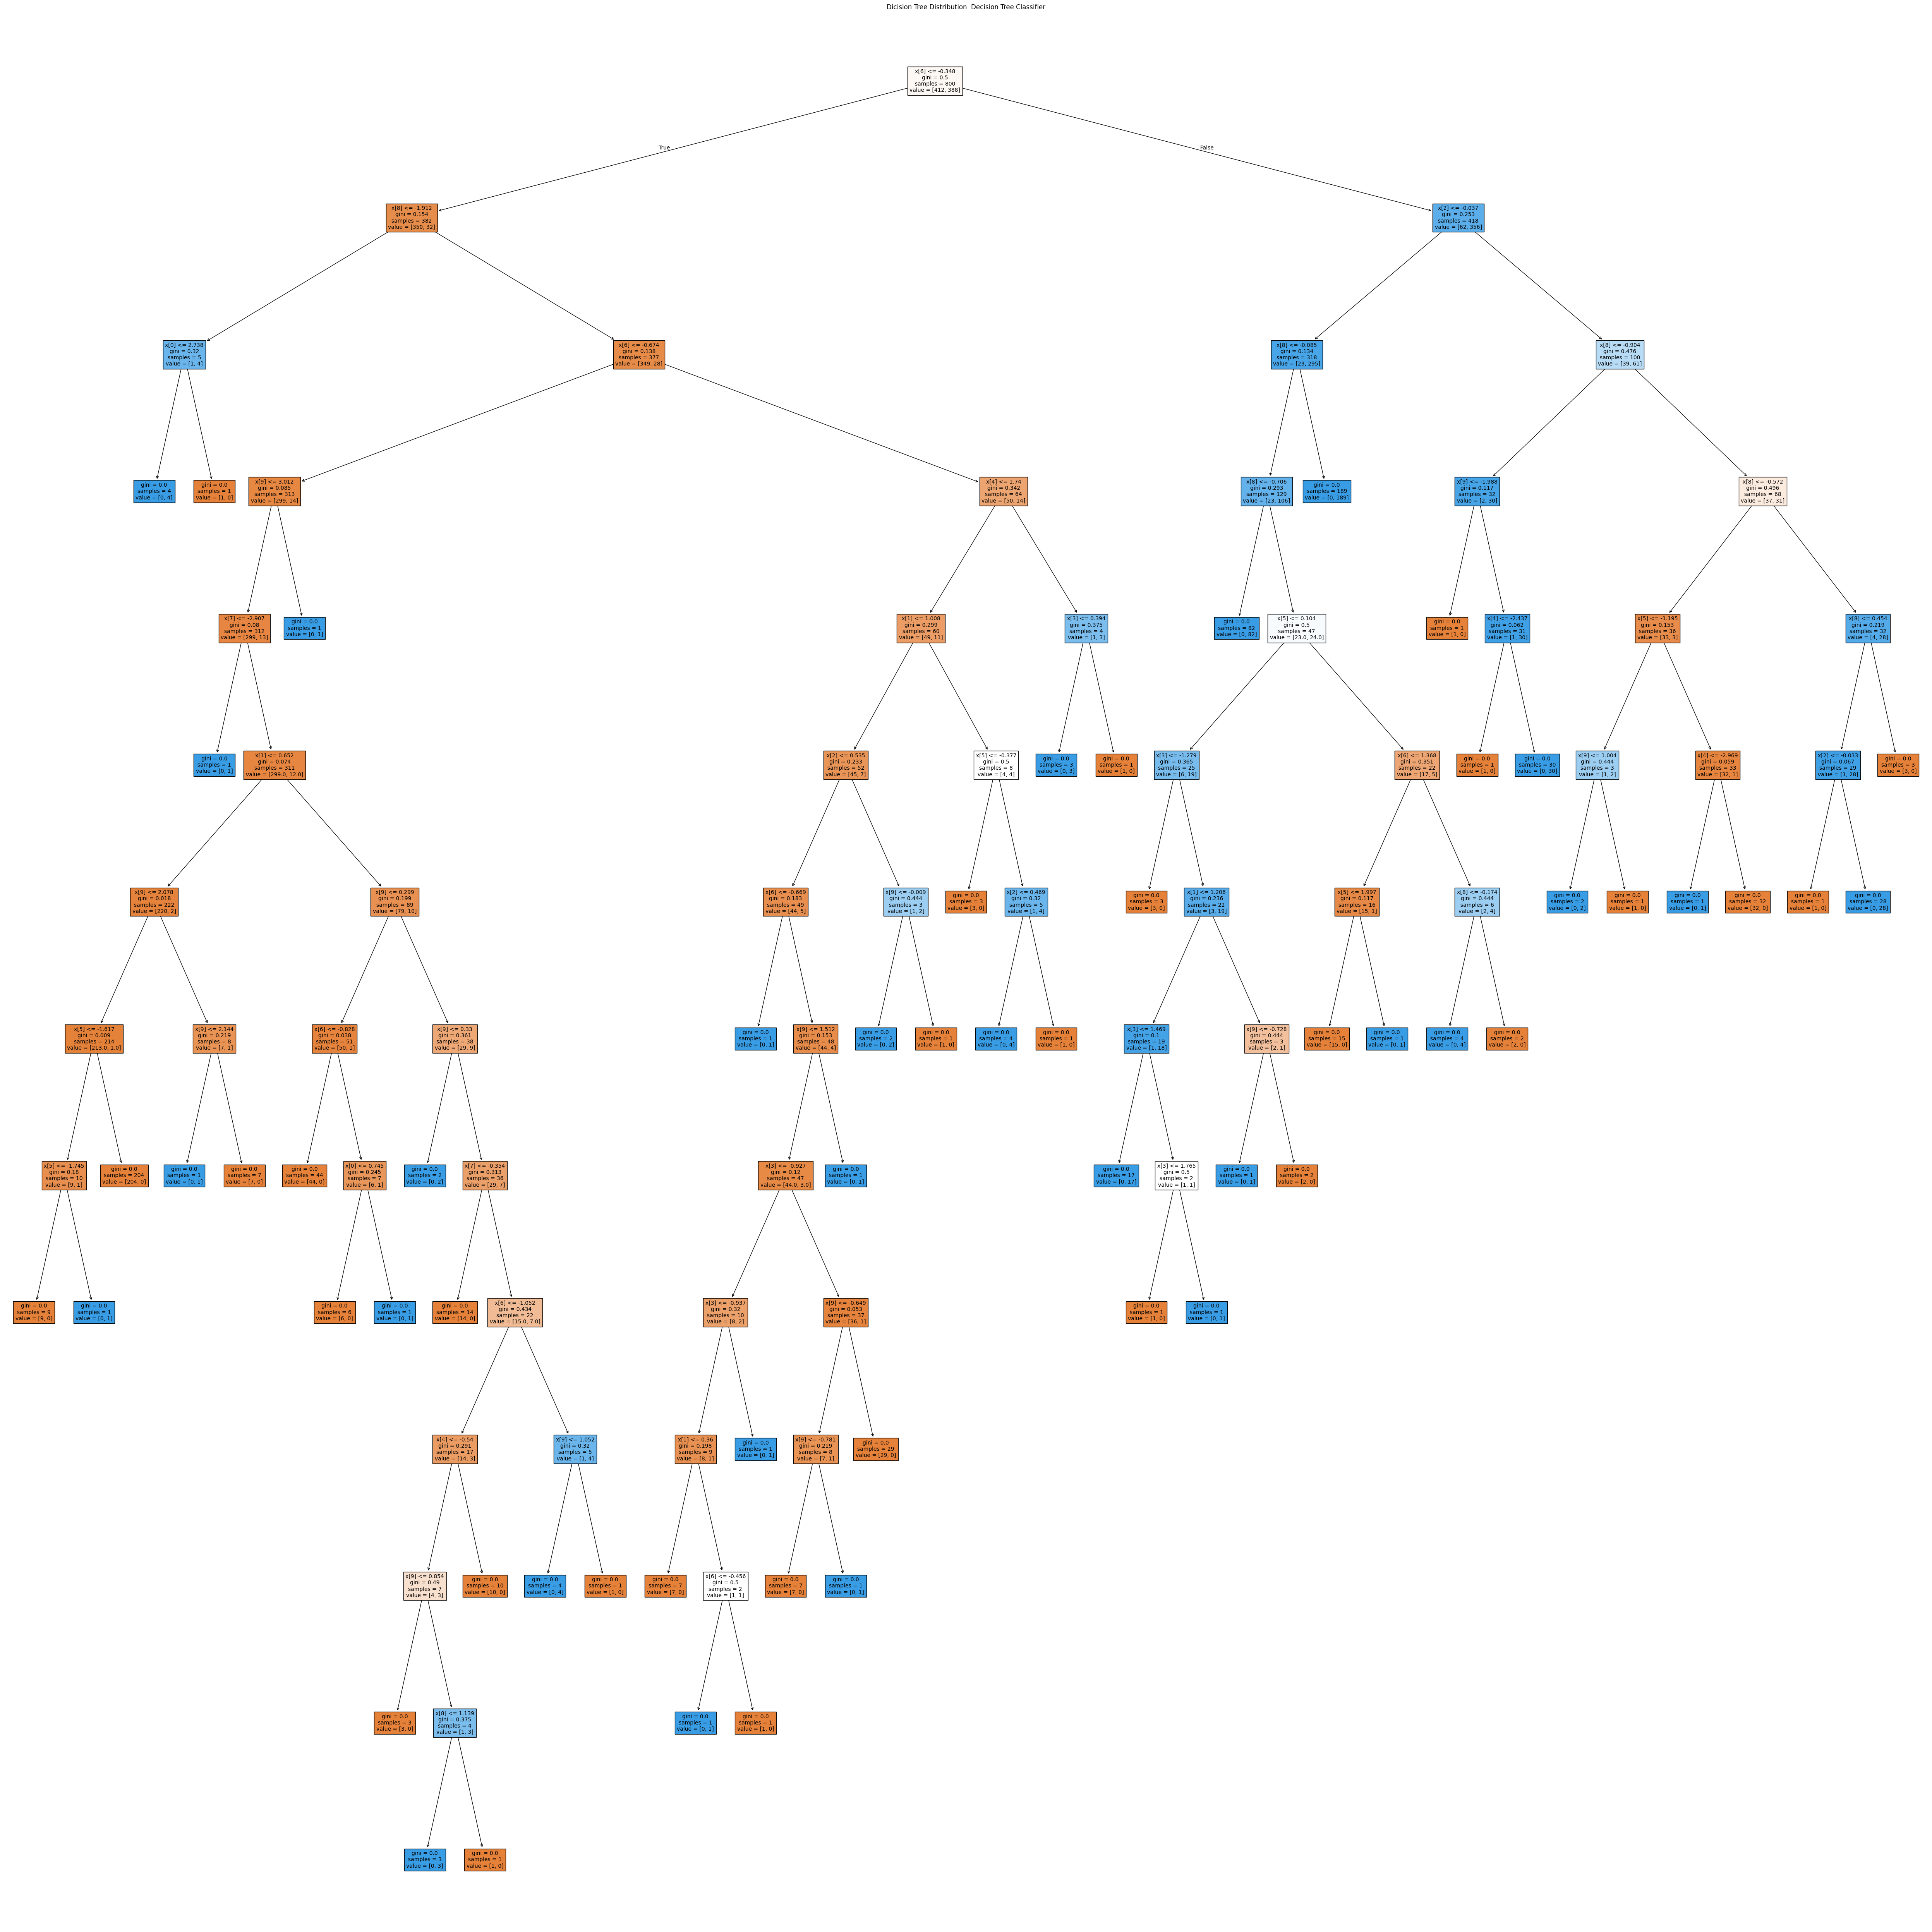

In [7]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

print("Dicision Tree Distribution  Decision Tree Classifier")
plt.rcParams['figure.figsize'] = (50,50)
plot_tree(model, filled=True, fontsize=10)
plt.title(f"Dicision Tree Distribution  Decision Tree Classifier")
plt.tight_layout()
plt.show()

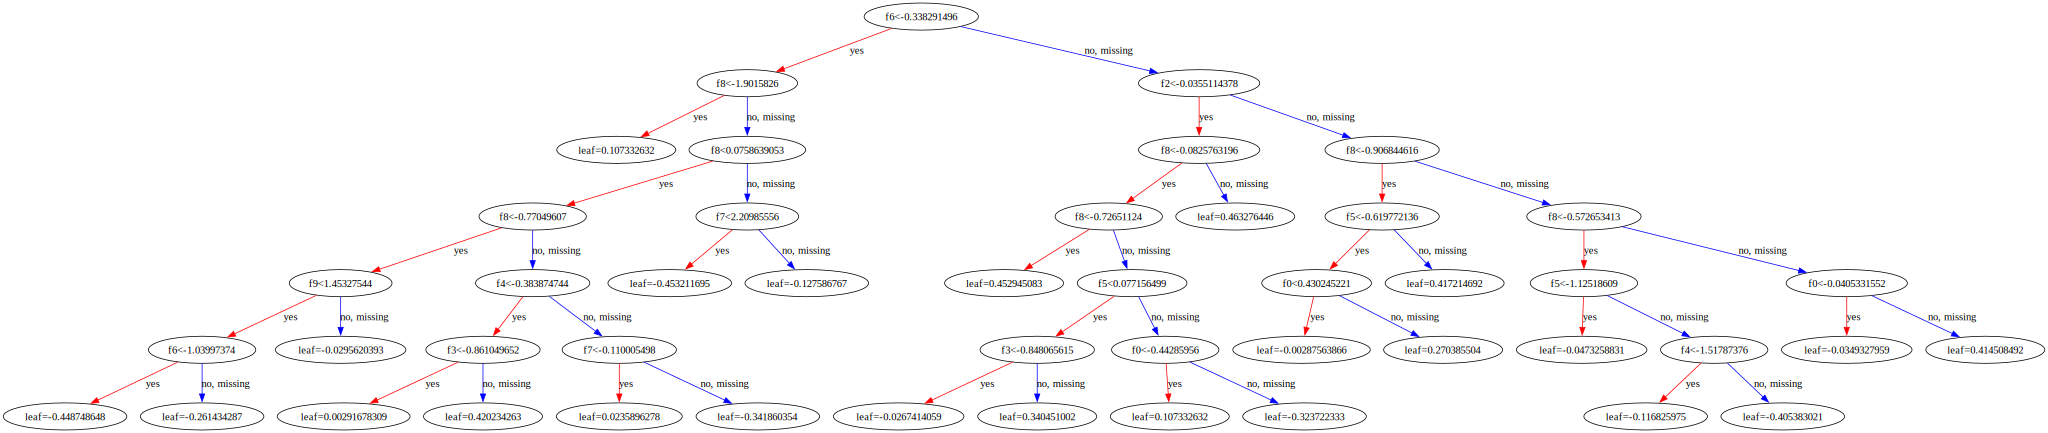

<Figure size 5000x5000 with 0 Axes>

In [8]:
model = XGBClassifier()
model.fit(x_train, y_train)

disgraph = xgb.to_graphviz(model,tree_idx=1)
display(disgraph)
plt.tight_layout()
plt.show()

# After Observing all the model and its scores XGBoost is best for this

In [11]:
df_result

,Model,Train_Score,Test_Score,Accuracy,Precision,Recall,F1_Score,Confusion_Matrix,AUC_Score
0,Logistic Regression,0.87,0.830,0.830,0.866667,0.819820,0.842593,"[[75, 14], [20, 91]]",0.831258
1,Decision Tree Classifier,1.00,0.835,0.835,0.854545,0.846847,0.850679,"[[73, 16], [17, 94]]",0.833536
2,Random Forest Classifier,1.00,0.885,0.885,0.923077,0.864865,0.893023,"[[81, 8], [15, 96]]",0.887489
3,XGBoost Classifier,1.00,0.895,0.895,0.932692,0.873874,0.902326,"[[82, 7], [14, 97]]",0.897611


In [9]:
df_result.iloc[3,:]

Model                XGBoost Classifier
Train_Score                         1.0
Test_Score                        0.895
Accuracy                          0.895
Precision                      0.932692
Recall                         0.873874
F1_Score                       0.902326
Confusion_Matrix    [[82, 7], [14, 97]]
AUC_Score                      0.897611
Name: 3, dtype: object

In [10]:
df_score

,Model,Train_Score,Test_Score
0,Logistic Regression,0.87,0.830
1,Decision Tree Classifier,1.00,0.835
2,Random Forest Classifier,1.00,0.885
3,XGBoost Classifier,1.00,0.895
